## Principal component analysis (PCA)

[Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis#Singular_value_decomposition) (PCA) is a close "relative" of SVD. 

What is the main objective of PCA? PCA reveals data structure by offering the best explanation of data variance. When a multidimensional dataset is visualized in a high dimensional data space by using coordinates, PCA offers a lower dimensional subspace view or "shadow" to the user, providing the most informative view by projecting the dataset onto this subspace. This is achieved by dimensionality reduction using the first few principal components.

PCA is therefore very useful for data visualization or for different machine learning procedures (regression, clustering).

Let  $\mathbf{X}$ is a $p\times n$ matrix, its rows are the "features", its columns are the "measurements".  "Features" are measured values or their combinations. 

If each row of $\mathbf{X}$ has zero average then its empirical covariance matrix:

$$\mathbf{C}_{\mathbf{X}} = \frac{1}{n-1} \mathbf{X}\mathbf{X}^T$$

Let us make SVD decomposition of the matrix $\mathbf{C}_{\mathbf{X}}$:

$$\mathbf{C}_{\mathbf{X}} =  \mathbf{P}\mathbf{\Lambda}\mathbf{P}^T.$$

Matrix $\mathbf{Y}=\mathbf{P}\mathbf{X}$ gives representation of matrix $\mathbf{X}$ in terms of principal components.

SVD of $\mathbf{X}$ can also provide the PCA. SVD decomposition of $\mathbf{X}$ is:

$$\mathbf{X}=\mathbf{U}\mathbf{S}\mathbf{V}^T.$$

Columns of the $p\times p$ matrix $\mathbf{U}$ are the *principal components* of the covariance matrix $\mathbf{C}_{\mathbf{X}}$.

PCA tries to find a new coordinate system in which the variance with respect to the first component is maximum. It turns out that this is the SVD (eigenvalue) decomposition of the covariance matrix $\mathbf{C}$. As there belongs an eigenvalue to each eigenvector, hence if we select a subset of eigenvectors (typically these belong to the largest of eigenvalues), dimension of the feature vectors' space can be reduced by projecting onto this subspace. 

Let the $m\times k$ matrix $\mathbf{\hat{U}}$ contain left eigenvectors of SVD where only columns of eigenvectors belonging to the $k$ largest eigenvalues were selected. Then approximation of matrix $\mathbf{X}$ by a matrix  $\mathbf{\hat{X}}$ $n\times k$ is:

$$\mathbf{\hat{X}}=\mathbf{\hat{U}}\mathbf{X}.$$


As a first step we write the Python function `PCA(X)` to calculate principal component analysis of matrix `X`. This works by subtracting row-wise mean of `X` (because rows of `X` contain measurements of the values). Then the covariance matrix `Cx` is calculated. Finally we diagonalize by using the `eig()` function.

In [1]:
import numpy as np
# PCA function
def PCA(X):
    """ performs principal component analysis (PCA)
        of data matrix A of size (p,n)
        rows of X are measurements of features, columns contain all features for a particular measurement

    Results :  
      var :
        variances of principal components
      Y   : 
        view of 'X' in the space of principal components, Y = P.X
      P  : 
        vector of eigenvalues of the covariance matrix 'X'.
    """
    # subtract row-wise mean
    M = (X - np.mean(X,axis=1,keepdims=True))
    # calculate undistorted estimation of the covariance matrix of X
    Cx = 1.0/(X.shape[1]-1) * np.dot(M,M.T)
    # eigenvalues and eigenvectors of Cx    
    var, P = np.linalg.eig(Cx) # eigenvalues are not always sorted!
    Y = np.dot(P,M)   # data projection onto subspace
    return var, Y, P

Sample dataset with 2 variables. Rows of matrix `X` are the features.

In [2]:
X = np.array([ [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9],
            [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1] ])
# PCA analysis
var, Y, P = PCA(X)
print(var)
print(Y)
print(P)

[1.28402771 0.0490834 ]
[[-1.07495104e-01 -1.55202114e-03  4.63456244e-01  1.52193204e-01
  -7.31119496e-02  2.48633173e-01 -3.56701329e-01 -4.64172582e-02
  -1.77646297e-02 -2.61240329e-01]
 [ 8.39431238e-01 -1.78331085e+00  9.57814340e-01  2.62749365e-01
   1.68726247e+00  8.95757526e-01 -7.04568090e-02 -1.14457216e+00
  -4.38046137e-01 -1.20662898e+00]]
[[ 0.73517866 -0.6778734 ]
 [ 0.6778734   0.73517866]]


The two proincipal components are shown by dashed lines, blue dots show the original data, red stars show new data. The first principal component shows the maximum variability in the data and the second is orthogonal to it. 

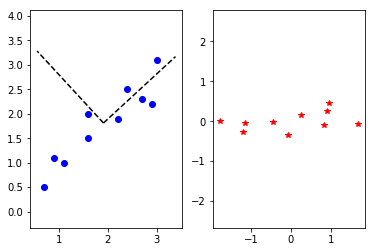

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(121)
# each eigenvector shows a principal component
m = np.mean(X,axis=1)
plt.plot([0, P[0,0]*2]+m[0], [0, P[1,0]*2]+m[1],'--k')
plt.plot([0, P[0,1]*2]+m[0], [0, P[1,1]*2]+m[1],'--k')
plt.plot(X[0,:],X[1,:],'ob') # measurements
plt.axis('equal')
plt.subplot(122)
# transformed data
plt.plot(Y[1,:],Y[0,:],'*r')
plt.axis('equal')
plt.show()

Let us calculate principal components by SVD. Calculate SVD decomposition of matrix `M`:

In [6]:
M = (X - np.mean(X,axis=1,keepdims=True))
print(M)
U,S,V = np.linalg.svd(M)
print(S**2/(M.shape[1]-1))
print(U)

[[ 0.49 -1.21  0.99  0.29  1.09  0.79 -0.31 -0.81 -0.31 -1.01]
 [ 0.69 -1.31  0.39  0.09  1.29  0.49  0.19 -0.81 -0.31 -0.71]]
[1.28402771 0.0490834 ]
[[-0.73517866 -0.6778734 ]
 [-0.6778734   0.73517866]]


Variances calculated by squares of singular values `S` (disregarding a factor of $1/(n-1)$) and principal components in the columns of matrix `U` (disregarding a factor of $-1$ for the first component) are identical with those obtained by eigendecomposition of the covariance matrix.

The following example shows PCA of a dataset with four features. Now columns of matrix `X` are the features, therefore PCA is performed on its transpose.

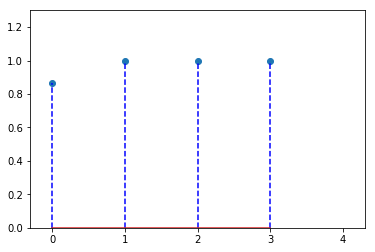

matrix X in terms of its principal components:
[ 1.38594653e+01  2.14053472e+00 -1.82700458e-15  1.82836690e-16]
rank of X: 3


In [8]:
X = np.array([[-1, 1, 2, 2],
             [-2, 3, 1, 0],
             [ 4, 0, 3,-1]],dtype=np.double)

var, Y, P = PCA(X.T)
perc = np.cumsum(var)/np.sum(var)
plt.figure()
# the following figure shows that practically the first two components
# give the total (1 = 100%) variability
plt.stem(range(len(perc)),perc,'--b')
plt.axis([-0.3,4.3,0,1.3])
plt.show()
print('matrix X in terms of its principal components:')
print(var.T) # only the first two columns are nonzero
print('rank of X: ', end='')
print(np.linalg.matrix_rank(X))